In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
loan_data = pd.read_csv('Task 3 and 4_Loan_Data.csv')

In [6]:
features = ['credit_lines_outstanding', 'loan_amt_outstanding', 'total_debt_outstanding',
            'income', 'years_employed', 'fico_score']
target = 'default'

X = loan_data[features]
y = loan_data[target]

In [7]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Logistic Regression

In [8]:
# Initialize and fit Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [10]:
# Predict probabilities
log_preds = log_model.predict_proba(X_test)[:, 1]

# Calculate metrics
log_auc = roc_auc_score(y_test, log_preds)
print(f"Logistic Regression ROC-AUC Score: {log_auc:.4f}")

# Classification report
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, (log_preds > 0.5).astype(int)))

Logistic Regression ROC-AUC Score: 1.0000

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2060
           1       1.00      0.99      0.99       440

    accuracy                           1.00      2500
   macro avg       1.00      0.99      1.00      2500
weighted avg       1.00      1.00      1.00      2500



In [11]:
def calculate_expected_loss_logistic(model, borrower_info, recovery_rate=0.10):
    input_features = np.array([
        borrower_info['credit_lines_outstanding'],
        borrower_info['loan_amt_outstanding'],
        borrower_info['total_debt_outstanding'],
        borrower_info['income'],
        borrower_info['years_employed'],
        borrower_info['fico_score']
    ]).reshape(1, -1)

    prob_default = model.predict_proba(input_features)[0, 1]
    expected_loss = prob_default * (1 - recovery_rate) * borrower_info['loan_amt_outstanding']

    return prob_default, expected_loss

In [30]:
sample_borrower = {
    'credit_lines_outstanding': 2,
    'loan_amt_outstanding': 10000,
    'total_debt_outstanding': 30000,
    'income': 50000,
    'years_employed': 10,
    'fico_score': 700
}

pd_logistic, el_logistic = calculate_expected_loss_logistic(log_model, sample_borrower)
print(f"\nLogistic Regression -> PD: {pd_logistic:.2%}, Expected Loss: ${el_logistic:.2f}")


Logistic Regression -> PD: 98.84%, Expected Loss: $8896.04


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Random Forest

In [31]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
rf_preds = rf_model.predict_proba(X_test)[:, 1]
rf_auc = roc_auc_score(y_test, rf_preds)
print(classification_report(y_test, (rf_preds > 0.5).astype(int)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2060
           1       0.99      0.99      0.99       440

    accuracy                           1.00      2500
   macro avg       0.99      0.99      0.99      2500
weighted avg       1.00      1.00      1.00      2500



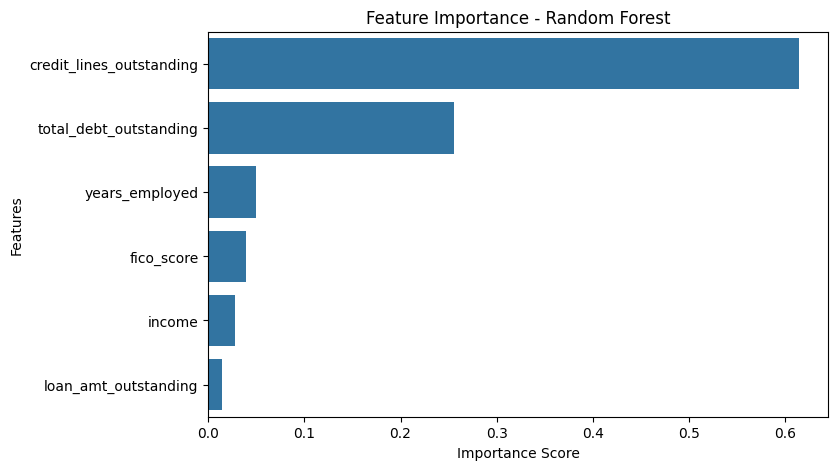

In [34]:
# Feature Importance
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [36]:
def calculate_expected_loss_rf(model, borrower_info, recovery_rate=0.10):
    """
    Predicts PD and calculates Expected Loss for a borrower using Random Forest model.
    """
    input_features = np.array([
        borrower_info['credit_lines_outstanding'],
        borrower_info['loan_amt_outstanding'],
        borrower_info['total_debt_outstanding'],
        borrower_info['income'],
        borrower_info['years_employed'],
        borrower_info['fico_score']
    ]).reshape(1, -1)

    # Predict probability of default
    prob_default = model.predict_proba(input_features)[0, 1]

    # Expected Loss calculation
    expected_loss = prob_default * (1 - recovery_rate) * borrower_info['loan_amt_outstanding']

    return prob_default, expected_loss

In [37]:
# Sample borrower profile
sample_borrower = {
    'credit_lines_outstanding': 2,
    'loan_amt_outstanding': 7000,
    'total_debt_outstanding': 15000,
    'income': 50000,
    'years_employed': 4,
    'fico_score': 610
}

# Predict
pd_rf, el_rf = calculate_expected_loss_rf(rf_model, sample_borrower)

print(f"Random Forest -> Probability of Default (PD): {pd_rf:.2%}")
print(f"Random Forest -> Expected Loss (EL): ${el_rf:.2f}")

Random Forest -> Probability of Default (PD): 30.00%
Random Forest -> Expected Loss (EL): $1890.00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
